In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning and File reading.

To integrate the five files, we began by evaluating each in Excel to better understand the data structure and content. Upon analysis, we discovered that all files shared identical columns, with a few exceptions: some files added irrelevant columns such as Lower Whisker, Upper Whisker, and Lower Interval. To streamline the dataset, we removed the superfluous columns directly from Excel.

Additionally, we discovered anomalies in column names across the files. For example, Happiness Score was sometimes written as Happiness.score. To solve this, we cleaned up the data and standardized the column names in Excel to increase readability and consistency.

In [2]:
# As the data set is given separately for 5 different years,
# we will load each dataset and concatenate them as they have same columns but for different years


# Load Datasets path.
file_path = {'2015':'2015.csv',
            '2016':'2016.csv',
            '2017':'2017.csv',
            '2018':'2018.csv',
            '2019':'2019.csv'}

#Function for loading each dataset.
def load_data(file_path):
    data_frames=[]
    for year,path in file_path.items():
        df = pd.read_csv(path)
        df['Year'] = int(year)
        data_frames.append(df)
    return pd.concat(data_frames, axis = 0)

#Combining all data
happiness_df = load_data(file_path)

#Displaying the combined data.
happiness_df=happiness_df.reset_index()
happiness_df=happiness_df.drop(columns = 'index')
happiness_df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


In [3]:
#checking for null values
null_values = happiness_df.isnull().sum()
null_values

Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Social support                     0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
Year                               0
dtype: int64

In [4]:
happiness_df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Social support                   float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [5]:
happiness_df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [6]:
#fill the null values
happiness_df=happiness_df.fillna(0)

In [7]:
#Summarize statistics
stats =happiness_df.describe().drop(columns='Year')
stats

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.149806,0.194045,1.257771
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122795,0.120271,1.115230
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.060812,0.103000,0.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.108355,0.179000,1.598425
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.203934,0.258997,2.202105
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,3.837720


In [8]:
#Happiness score per year of each country.
Happiness_score=happiness_df.groupby(['Year','Country'])['Happiness Score'].sum()

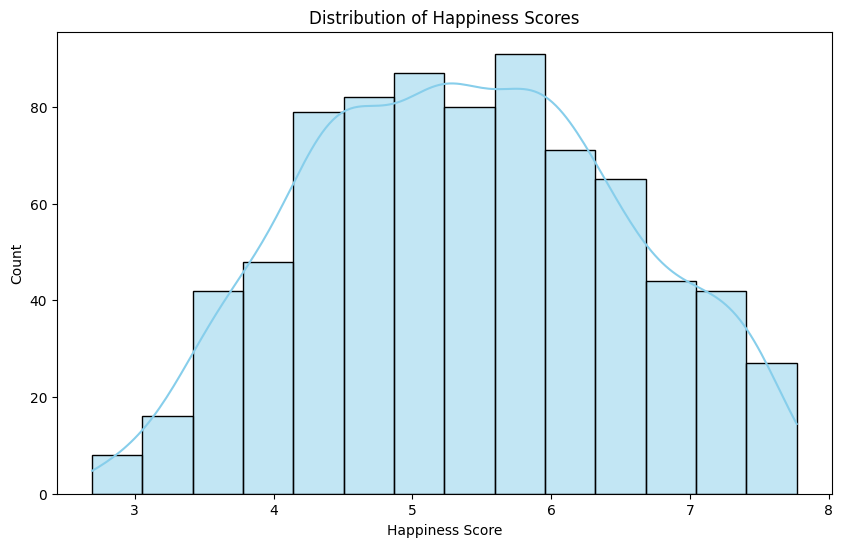

In [9]:
# Distribution of Happiness score over the five years.

plt.figure(figsize=(10, 6))
sns.histplot(happiness_df['Happiness Score'], kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.show()

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Happiness Score, dtype: float64


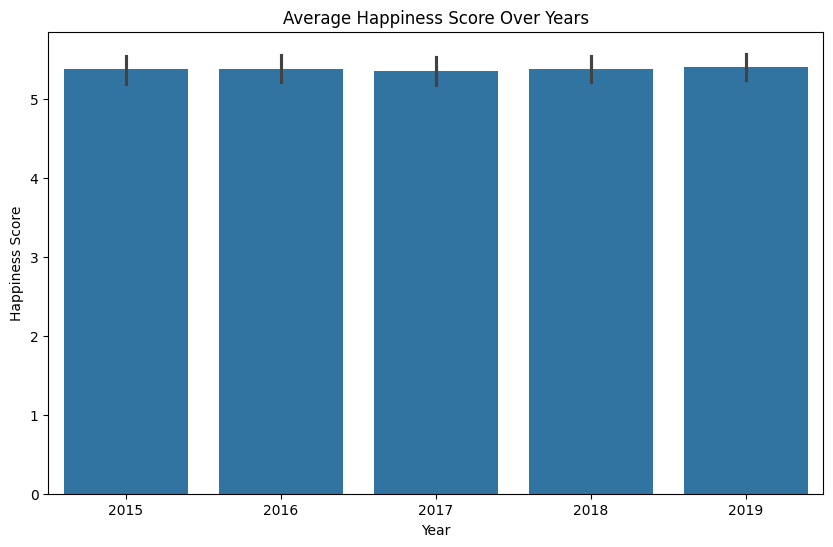

In [10]:
# Average Happiness Score by Year

Avg_Happiness_score=happiness_df.groupby('Year')['Happiness Score'].mean()
print(Avg_Happiness_score)

plt.figure(figsize=(10, 6))
sns.barplot(data=happiness_df, x="Year", y="Happiness Score")
plt.title('Average Happiness Score Over Years')
plt.show()

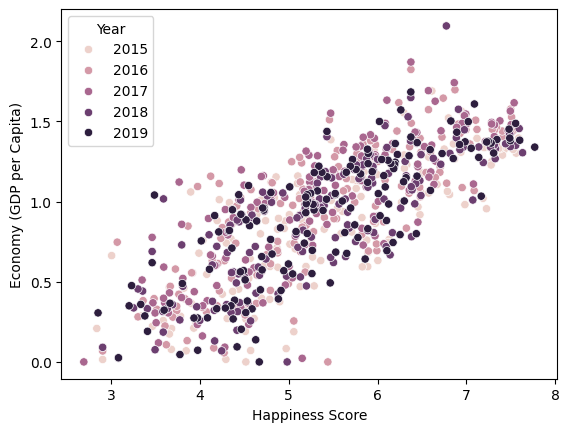

In [11]:
sns.scatterplot(x=happiness_df['Happiness Score'],y=happiness_df['Economy (GDP per Capita)'], hue="Year",data= happiness_df )
plt.show()

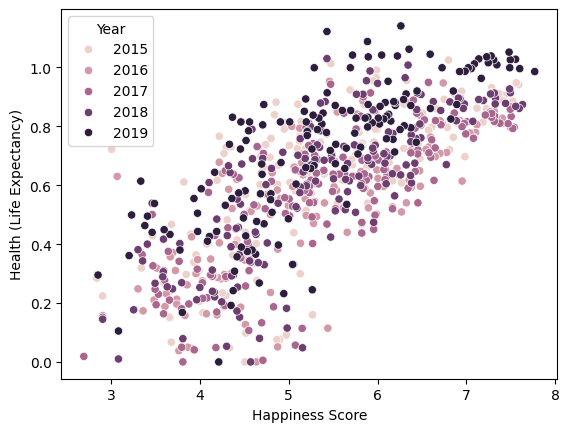

In [12]:
sns.scatterplot(x=happiness_df['Happiness Score'],y=happiness_df['Health (Life Expectancy)'], hue="Year", data= happiness_df )
plt.show()

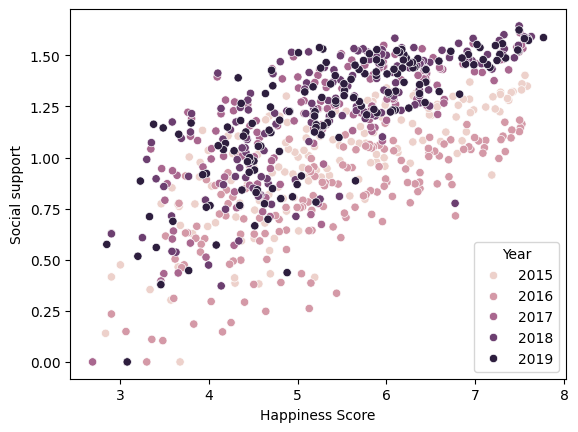

In [13]:
sns.scatterplot(x=happiness_df['Happiness Score'],y=happiness_df['Social support'], hue="Year",data= happiness_df )
plt.show()

In [14]:
happiness_df.corr(numeric_only = True)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.284771,-0.154652,-0.144089,-0.007768
Happiness Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.300155,0.181784,0.142160,0.007065
Economy (GDP per Capita),-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.228864,0.015526,0.042016,0.019768
Social support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.153832,-0.082652,-0.325728,0.367431
Health (Life Expectancy),-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.135682,0.092237,-0.130571,0.130302
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.380857,0.311842,-0.049524,0.010353
Trust (Government Corruption),-0.284771,0.300155,0.228864,0.153832,0.135682,0.380857,1.000000,0.165297,0.184113,-0.105284
Generosity,-0.154652,0.181784,0.015526,-0.082652,0.092237,0.311842,0.165297,1.000000,0.085418,-0.196792
Dystopia Residual,-0.144089,0.142160,0.042016,-0.325728,-0.130571,-0.049524,0.184113,0.085418,1.000000,-0.827967
Year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,-0.105284,-0.196792,-0.827967,1.000000


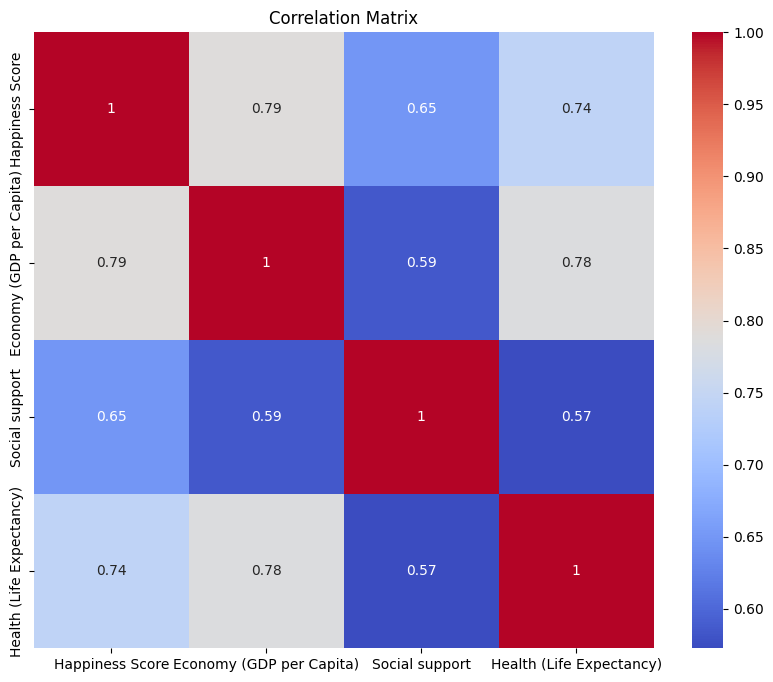

In [15]:
selected_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)']
plt.figure(figsize=(10, 8))
correlation_matrix = happiness_df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Relationship happiness scores and features like GDP, social support, and life expectancy.

As per the correlation score and the scatterplots for each we can say they have a strong positive relation, showcasing an increase with increase in the other.

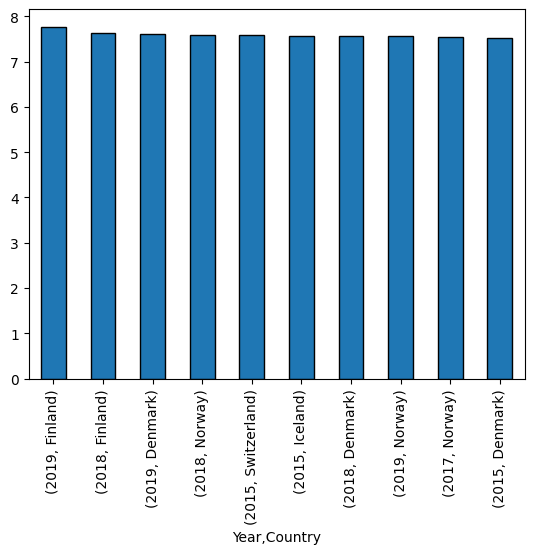

Year  Country    
2019  Finland        7.769
2018  Finland        7.632
2019  Denmark        7.600
2018  Norway         7.594
2015  Switzerland    7.587
      Iceland        7.561
2018  Denmark        7.555
2019  Norway         7.554
2017  Norway         7.537
2015  Denmark        7.527
Name: Happiness Score, dtype: float64


In [16]:
#Top 10 Happy Countries overall in 5 years
Happiness_score_10=happiness_df.groupby(['Year','Country'])['Happiness Score'].sum().sort_values(ascending =False).head(10)
Happiness_score_10.plot(kind='bar',edgecolor = 'black')
plt.show()
print(Happiness_score_10)

In [17]:
# Top 10 happiest countries for each year

top_10_countries = (happiness_df.groupby("Year").apply(lambda x: x.nlargest(10, 'Happiness Score')))
#The nlargest(10, 'Happiness Score') method selects the top 10 rows from x based on the column 'Happiness Score'.

print("Top 10 Happiest Countries Each Year:",'\n')
print(top_10_countries[['Country', 'Happiness Score']])


Top 10 Happiest Countries Each Year: 

              Country  Happiness Score
Year                                  
2015 0    Switzerland            7.587
     1        Iceland            7.561
     2        Denmark            7.527
     3         Norway            7.522
     4         Canada            7.427
     5        Finland            7.406
     6    Netherlands            7.378
     7         Sweden            7.364
     8    New Zealand            7.286
     9      Australia            7.284
2016 158      Denmark            7.526
     159  Switzerland            7.509
     160      Iceland            7.501
     161       Norway            7.498
     162      Finland            7.413
     163       Canada            7.404
     164  Netherlands            7.339
     165  New Zealand            7.334
     166    Australia            7.313
     167       Sweden            7.291
2017 315       Norway            7.537
     316      Denmark            7.522
     317      Iceland    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_57992\728910403.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_countries = (happiness_df.groupby("Year").apply(lambda x: x.nlargest(10, 'Happiness Score')))


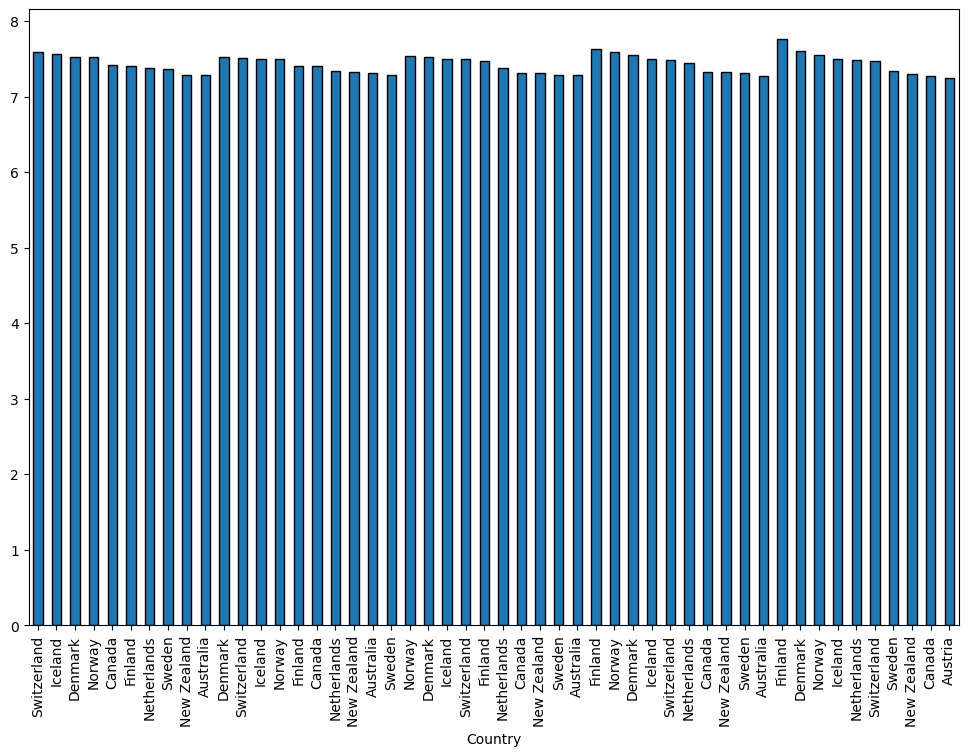

In [18]:
top_10_countries.set_index('Country')['Happiness Score'].plot(kind='bar',edgecolor = 'black', figsize= (12,8))
plt.show()

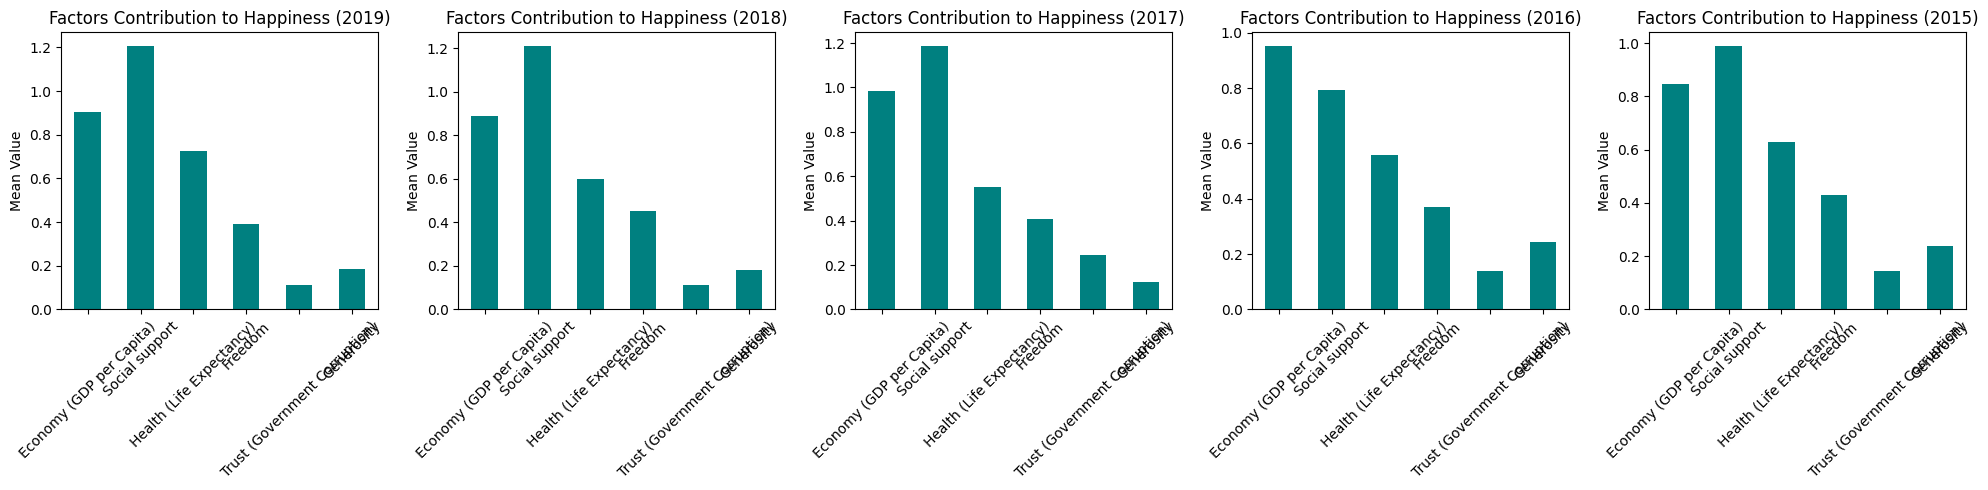

In [19]:
# Calculate the mean contribution of factors for each year
years = [2019, 2018, 2017, 2016, 2015]
factor_contributions = {}

for year in years:
    factor_contributions[year] = happiness_df[happiness_df['Year'] == year][[
        'Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity'
    ]].mean()

# Create subplots for all years
plt.figure(figsize=(20, 5))  # Adjust figure size for better visibility

for i, year in enumerate(years, 1):
    plt.subplot(1, 5, i)
    factor_contributions[year].plot(kind='bar', color='teal')
    plt.title(f'Factors Contribution to Happiness ({year})')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## 1. Insights for NGOs
### NGOs focus on factors related to social well-being, such as Social Support, Generosity, and Healthy Life Expectancy. The goal is to identify countries with low scores in these areas and provide recommendations.

In [20]:
# Average social support, generosity, and healthy life expectancy by country
ngo_factors = happiness_df.groupby('Country')[['Social support', 'Generosity', 'Health (Life Expectancy)']].mean()

# Sort countries by the lowest average scores for social support and healthy life expectancy
low_social_support = ngo_factors.sort_values('Social support').head(10)
low_life_expectancy = ngo_factors.sort_values('Health (Life Expectancy)').head(10)

print("Top 10 Countries with Lowest Social Support:")
print(low_social_support)

print("\nTop 10 Countries with Lowest Health Life Expectancy:")
print(low_life_expectancy)

Top 10 Countries with Lowest Social Support:
                          Social support  Generosity  Health (Life Expectancy)
Country                                                                       
Central African Republic        0.000000    0.186979                  0.050191
Togo                            0.323567    0.154529                  0.288529
Benin                           0.340470    0.156666                  0.275262
Syria                           0.355931    0.362821                  0.566281
Afghanistan                     0.409753    0.217588                  0.254707
Malawi                          0.434382    0.228334                  0.327070
Burundi                         0.470817    0.161864                  0.211608
Georgia                         0.481345    0.091199                  0.682831
South Sudan                     0.492378    0.200446                  0.198324
India                           0.588117    0.195851                  0.498926

Top 10

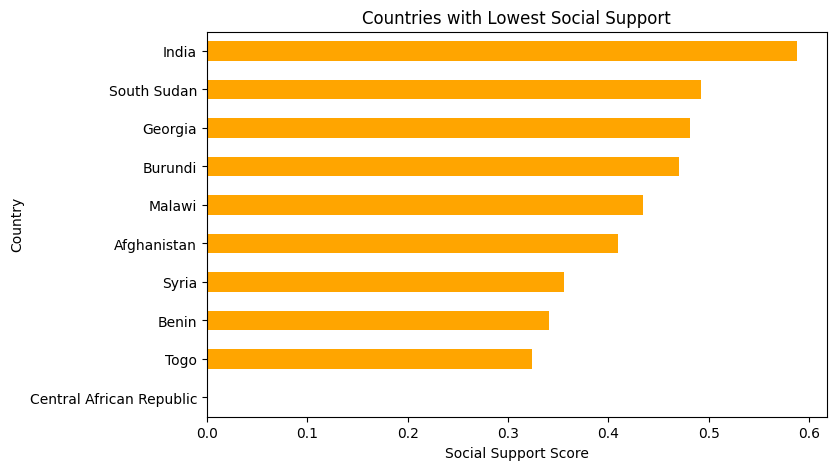

In [21]:
# Visualization: Low social support countries
low_social_support.plot(kind='barh', y='Social support', legend=False, color='orange', figsize=(8, 5))
plt.title('Countries with Lowest Social Support')
plt.xlabel('Social Support Score')
plt.ylabel('Country')
plt.show()

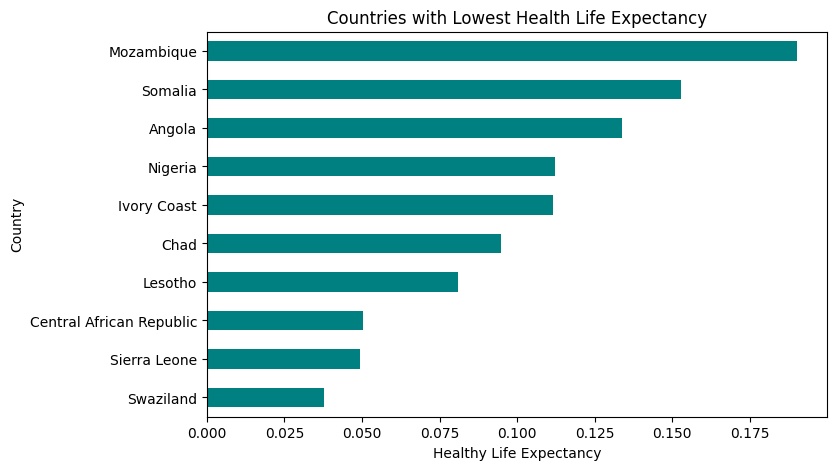

In [22]:
# Visualization: Low health life expectancy countries
low_life_expectancy.plot(kind='barh', y='Health (Life Expectancy)', legend=False, color='teal', figsize=(8, 5))
plt.title('Countries with Lowest Health Life Expectancy')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Country')
plt.show()

In [29]:
# Countries with high Social support but low happiness
high_social_low_happiness = happiness_df[(happiness_df['Social support'] > 1) & (happiness_df['Happiness Score'] < 5)]
print("Countries with High Social Support but Low Happiness:")
print(high_gdp_low_happiness[['Country', 'Social support', 'Happiness Score']])

Countries with High Social Support but Low Happiness:
          Country  Social support  Happiness Score
101        Greece        0.929330            4.857
102       Lebanon        0.800010            4.839
103       Hungary        1.202150            4.800
109          Iran        0.544470            4.686
133      Bulgaria        1.106140            4.218
142         Gabon        0.905280            3.896
262          Iran        0.388570            4.813
269          Iraq        0.592050            4.575
273  South Africa        0.960530            4.459
286      Bulgaria        0.925420            4.217
291         Gabon        0.723680            4.121
294      Botswana        0.891860            3.974
414      Mongolia        1.493011            4.955
415  South Africa        1.384789            4.829
416       Tunisia        0.868351            4.805
419      Bulgaria        1.434379            4.714
422          Iran        0.711551            4.692
431          Iraq        0.9

## 2. Insights for Governments
### Governments are typically more interested in broader economic and societal factors like GDP per Capita, Happiness Score, and the correlation between these factors. The focus is to identify key drivers of happiness for policy planning.

In [23]:
# Correlation between key factors and happiness score
gov_factors = happiness_df[['Happiness Score', 'Economy (GDP per Capita)','Health (Life Expectancy)']].corr()

print("Correlation Between Key Factors and Happiness Score:")
print(gov_factors['Happiness Score'])

Correlation Between Key Factors and Happiness Score:
Happiness Score             1.000000
Economy (GDP per Capita)    0.789284
Health (Life Expectancy)    0.742456
Name: Happiness Score, dtype: float64


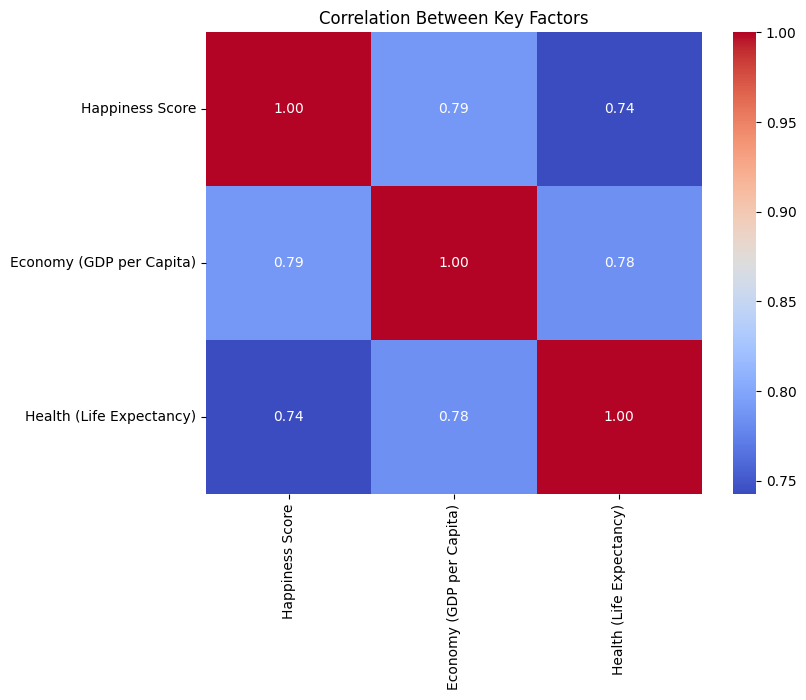

In [24]:
# Visualization: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gov_factors, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Key Factors')
plt.show()

In [25]:
# Countries with high GDP but low happiness (potential policy gaps)
high_gdp_low_happiness = happiness_df[(happiness_df['Economy (GDP per Capita)'] > 1) & (happiness_df['Happiness Score'] < 5)]
print("Countries with High GDP but Low Happiness:")
print(high_gdp_low_happiness[['Country', 'Economy (GDP per Capita)', 'Happiness Score']])

Countries with High GDP but Low Happiness:
          Country  Economy (GDP per Capita)  Happiness Score
101        Greece                  1.154060            4.857
102       Lebanon                  1.025640            4.839
103       Hungary                  1.120940            4.800
109          Iran                  1.008800            4.686
133      Bulgaria                  1.012160            4.218
142         Gabon                  1.060240            3.896
262          Iran                  1.117580            4.813
269          Iraq                  1.074740            4.575
273  South Africa                  1.024160            4.459
286      Bulgaria                  1.113060            4.217
291         Gabon                  1.158510            4.121
294      Botswana                  1.094260            3.974
414      Mongolia                  1.027236            4.955
415  South Africa                  1.054699            4.829
416       Tunisia                  1.00726

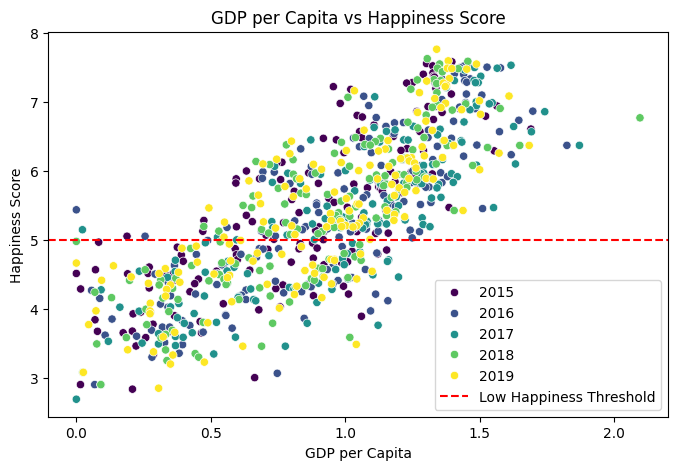

In [26]:
# Visualization: High GDP vs Low Happiness
plt.figure(figsize=(8, 5))
sns.scatterplot(data=happiness_df, x='Economy (GDP per Capita)', y='Happiness Score', hue='Year', palette='viridis')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.axhline(5, color='red', linestyle='--', label='Low Happiness Threshold')
plt.legend()
plt.show()

In [27]:
# Getting the cleaned and combined data set for streamlit app.
happiness_df.to_csv('World_happiness_report.csv', index=False)